<a href="https://colab.research.google.com/github/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/blob/main/Copia_de_Algoritmo_de_Maximizaci%C3%B3n_de_la_Esperanza_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Trabajo práctico 0 Algoritmno de maximización de la esperanza**
Ph. D. Saúl Calderón Ramírez
Instituto Tecnológico de Costa Rica,
Escuela de Computación
PAttern Recongition and MAchine Learning Group (PARMA-Group)
15 de febrero de 2024
Fecha de entrega:
Martes 20 de Febrero.
Entrega
: Un archivo .zip con el código fuente LaTeX o Lyx, el pdf, y un
jupyter en Pytorch, debidamente documentado, con una función definida por
ejercicio. A través del TEC-digital.
Modo de trabajo
: Grupos de 2 a 3 personas.

Grupo:

1-José Luis Medrano Cerdas

2-Geovanny Fernández Zeledón

3-César Jiménez Segura




# **Pregunta 1**

Cargue los dos conjuntos de datos provistos, y ajuste un modelo gaussiano a las dos clases (ataque y no ataque), para cada conjunto de datos.

Grafique los datos usando un scatter plot junto con las gráficas de los histogramas de los datos y las funciones de densidad de probabilidad Gaussianas con los parámetros estimados por cada modelo Gaussiano.

**Importa librerias**


In [ ]:
#Importa libreria Pandas para la lectura de CSVs
from numbers import Number
import torch
from torch.distributions import Exponential
from torch.distributions import Uniform
from torch.distributions import Normal
from torch.distributions.exp_family import ExponentialFamily
from torch.distributions.utils import broadcast_all
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

**Carga de datos**

Carga de datos, lo cual puede ser por medio de Google Drive o mediante GitHub.

Los Dataset del mes de Febrero y Marzo.

In [ ]:
#Carga de datos desde GoogleDrive **Solo ejecutar este script si va a trabajar desde Google Drive
#Lectura del Dataset desde archivo CSV
from google.colab import drive
drive.mount("/content/drive/")

ataquesFebreroDataset = "/content/drive/MyDrive/Análisis de datos en ciberseguridad/Tarea1/Dataset_february_attacks.csv"
ataquesMarzoDataset = "/content/drive/MyDrive/Análisis de datos en ciberseguridad/Tarea1/Dataset_march_attacks.csv"
dataset1 = pd.read_csv(ataquesFebreroDataset)
dataset2 = pd.read_csv(ataquesMarzoDataset)

#Imprime datos estadísticos
print(dataset1.describe())
print(dataset2.describe())

In [ ]:
#Carga de datos desde GitHub **Esta es la versión usada por el Grupo en línea
ataquesFebreroDataset= "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv"
ataquesMarzoDataset="https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv"
dataset1=pd.read_csv(ataquesFebreroDataset)
dataset2=pd.read_csv(ataquesMarzoDataset)

#Imprime datos estadísticos
print(dataset1.describe())
print(dataset2.describe())

       1.048848152160644531e+01  0.000000000000000000e+00
count                599.000000                599.000000
mean                  24.981199                  0.500835
std                   15.167808                  0.500417
min                    0.439706                  0.000000
25%                   10.044606                  0.000000
50%                   31.087248                  1.000000
75%                   39.823893                  1.000000
max                   46.252983                  1.000000
       6.097619533538818359e+00  0.000000000000000000e+00
count                399.000000                399.000000
mean                  20.016183                  0.501253
std                   10.332585                  0.500626
min                   -0.924006                  0.000000
25%                   10.024181                  0.000000
50%                   22.777351                  1.000000
75%                   29.860155                  1.000000
max           

In [ ]:
if torch.cuda.is_available():
  device=torch.device("cuda:0")
  print ("GPU")
else:
  device=torch.device("cpu")
  print ("CPU")

CPU


In [ ]:
#Imprime los datos
dataset1
dataset2

,6.097619533538818359e+00,0.000000000000000000e+00
0,9.901099,0.0
1,16.036081,0.0
2,13.293000,0.0
3,4.668411,0.0
4,13.394648,0.0
...,...,...
394,25.827717,1.0
395,33.984840,1.0
396,31.671436,1.0
397,27.437689,1.0


In [ ]:
#Elimina la columna
dataset1=dataset1.drop(dataset1.columns[[1]],axis='columns')
dataset2=dataset2.drop(dataset2.columns[[1]],axis='columns')

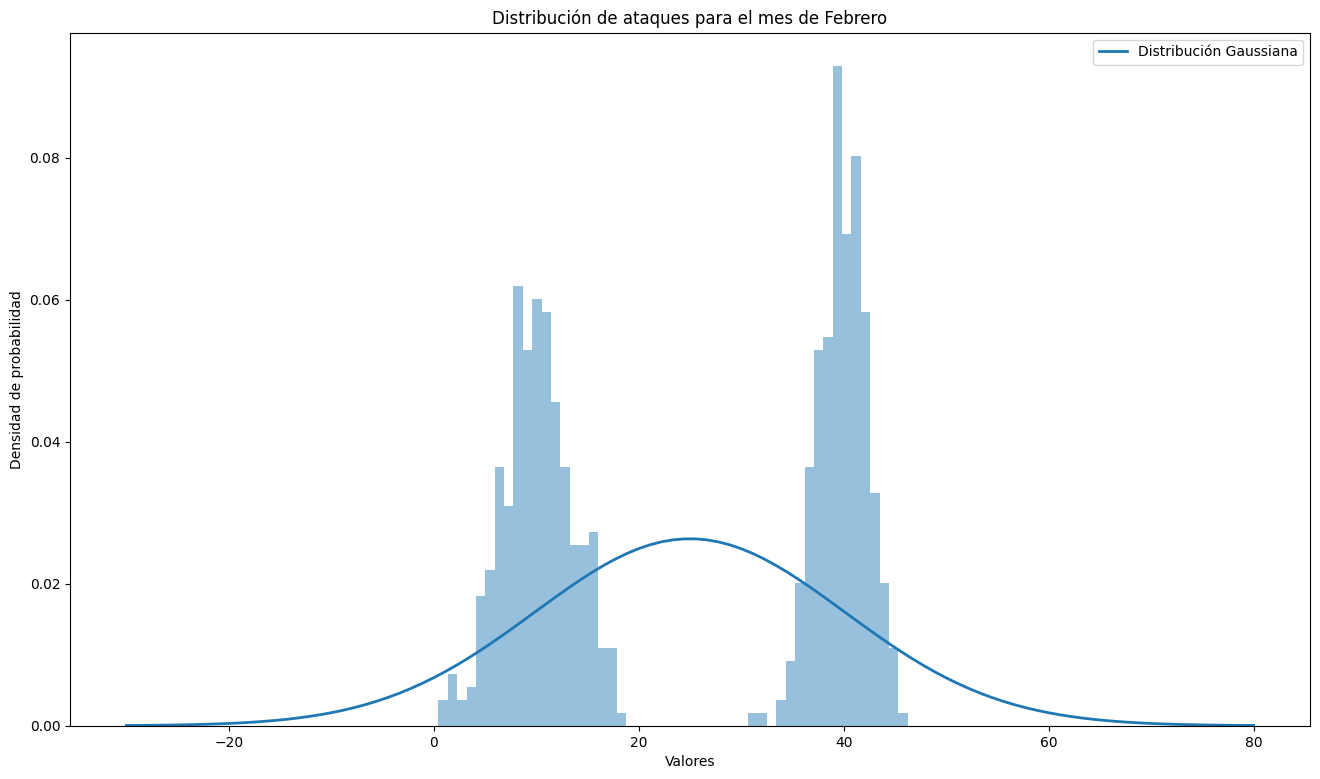

In [ ]:
#Histograma y grafico de densidad de probabilidad para Febrero
from scipy import stats
distribucion = stats.norm
parametros = distribucion.fit(data=dataset1) #Obtiene los parametros Mu y Std

x_hat = np.linspace(-30,80,num=100)
y_hat = distribucion.pdf(x_hat,*parametros)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x_hat, y_hat, linewidth=2, label="Distribución Gaussiana")
ax.hist(x=dataset1, density=True, bins=50, color="#3182bd", alpha=0.5)
ax.set_title('Distribución de ataques para el mes de Febrero')
ax.set_xlabel('Valores')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();


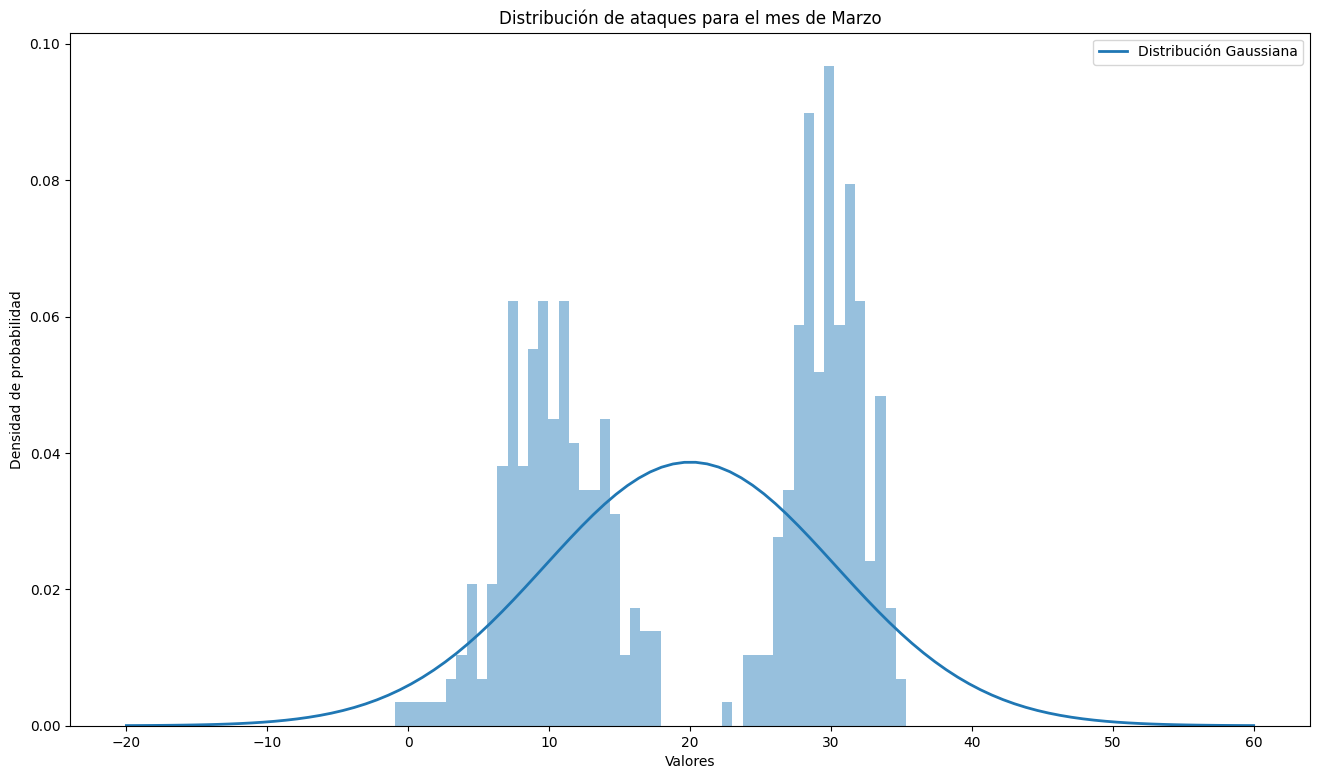

In [ ]:
#Histograma y grafico de densidad de probabilidad para Marzo
from scipy import stats
distribucion = stats.norm
parametrosMarzo = distribucion.fit(data=dataset2) #Obtiene los parametros Mu y Std

x_hatMarzo = np.linspace(-20,60,num=100)
y_hatMarzo = distribucion.pdf(x_hatMarzo,*parametrosMarzo)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x_hatMarzo, y_hatMarzo, linewidth=2, label="Distribución Gaussiana")
ax.hist(x=dataset2, density=True, bins=50, color="#3182bd", alpha=0.5)
ax.set_title('Distribución de ataques para el mes de Marzo')
ax.set_xlabel('Valores')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

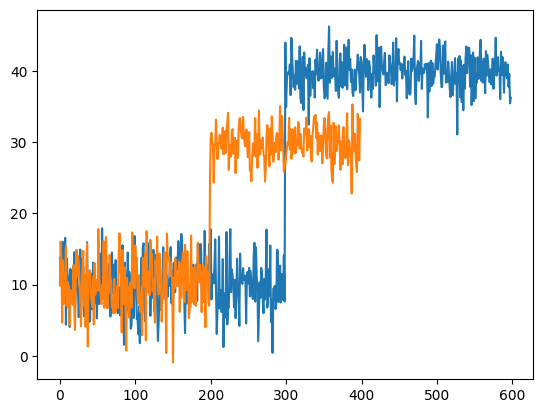

In [ ]:
plt.plot(dataset1)
plt.plot(dataset2)

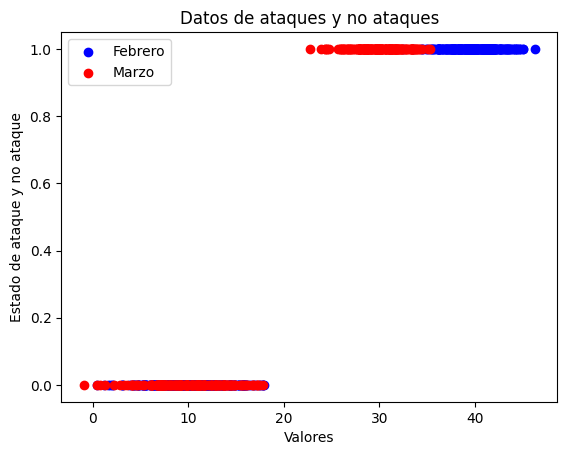

In [ ]:
plt.scatter(dataset1['x'],dataset1['y'],c='b',label="Febrero")
plt.scatter(dataset2['x'],dataset2['y'],c='r',label="Marzo")
plt.title("Datos de ataques y no ataques")
plt.xlabel("Valores")
plt.ylabel("Estado de ataque y no ataque")
plt.legend(loc="upper left")
plt.show()

In [ ]:
def plot_bar(bins, histogram, axis_x_label, axis_y_label, title):
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    #calculate the width of the histogram bins displayed
    width = np.max(bins) / bins.shape[0]
    print("Width: ", width)
    axes.bar(bins[0:].tolist(), histogram.tolist(), color ='maroon', width = width)
    plt.xlabel(axis_x_label)
    plt.ylabel(axis_y_label)
    plt.title(title)
    plt.show()

parametroMuFebrero tensor([[24.9812]], dtype=torch.float64)
parametroStdFebrero tensor([[15.1678]], dtype=torch.float64)
Width:  0.06


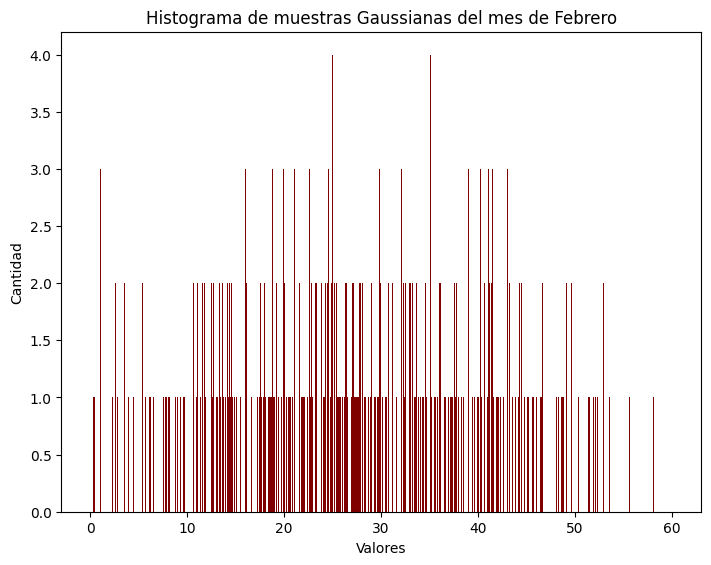

In [ ]:
#Calculo de los parametros del Dataset1 para el mes de Febrero
nFebrero = dataset1.shape[0] #Shape son las dimensiones del vector
parametroMuFebrero=torch.tensor([dataset1.mean()])
print ("parametroMuFebrero",parametroMuFebrero)
parametroStdFebrero=torch.tensor([dataset1.std()])
print ("parametroStdFebrero",parametroStdFebrero)
normalDistFebrero=torch.distributions.Normal(parametroMuFebrero,parametroStdFebrero)
gaussianSampleFebrero=normalDistFebrero.sample((nFebrero,1)).squeeze()
histogramGaussianFebrero,binsGaussianFebrero=np.histogram(gaussianSampleFebrero.numpy(),bins=1000,range=(0,60))
p_gaussian=torch.tensor(histogramGaussianFebrero / histogramGaussianFebrero.sum())
plot_bar(binsGaussianFebrero[1:], histogramGaussianFebrero,"Valores", "Cantidad", "Histograma de muestras Gaussianas del mes de Febrero")

Width:  0.06


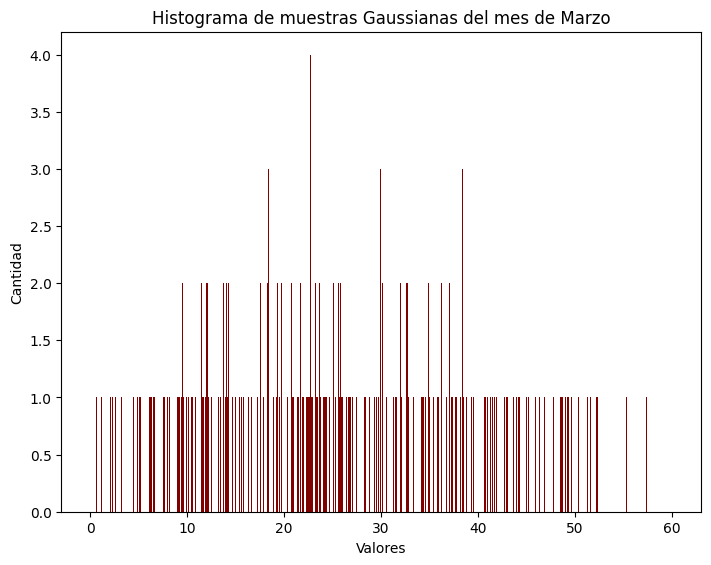

In [ ]:
#Calculo de los parametros del Dataset2 para el mes de Marzo
nMarzo = dataset2.shape[0] #Shape son las dimensiones del vector
parametroMuMarzo=torch.tensor([dataset1.mean()])
parametroStdMarzo=torch.tensor([dataset1.std()])
normalDistMarzo=torch.distributions.Normal(parametroMuFebrero,parametroStdMarzo)
gaussianSampleMarzo=normalDistFebrero.sample((nMarzo,1)).squeeze()
histogramGaussianMarzo,binsGaussianMarzo=np.histogram(gaussianSampleMarzo.numpy(),bins=1000,range=(0,60))
p_gaussian=torch.tensor(histogramGaussianMarzo / histogramGaussianMarzo.sum())
plot_bar(binsGaussianMarzo[1:], histogramGaussianMarzo,"Valores", "Cantidad", "Histograma de muestras Gaussianas del mes de Marzo")

# Pregunta 2

**Matriz random de K dimensiones**

Implemente la función init_random_parameters la cual genere una matriz de P 2 RK 2 dimensiones, con los parámetros de las funciones de densidad Gaussiana generados completamente al azar.

In [ ]:
#K representa la cantidad de clusters. En este caso, el 2 representa la cantidad de Datasets.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ataquesFebreroDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv"
ataquesMarzoDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv"
dataset1 = pd.read_csv(ataquesFebreroDataset)
dataset2 = pd.read_csv(ataquesMarzoDataset)
dataset1.columns = ['x','y']
dataset2.columns = ['x','y']

def init_random_parameters(k,datos):
    tamanoDataset=datos.shape[1]
    centroideMin=datos.min().min()
    centroideMax=datos.max().max()
    matrizParametros=[]

    for centroide in range(k):
        centroide = np.random.uniform(centroideMin,centroideMax,tamanoDataset)
        matrizParametros.append(centroide)
    matrizParametros=pd.DataFrame(matrizParametros,columns=datos.columns)
    return matrizParametros

# **Pregunta 3**

Implemente la función calculate_likelihood_gaussian_observation(x_n,mu_k,sigma_k) la cual calcule la verosimilitud de una observación específica xn, para una función de densidad Gaussiana con parámetros  k y  k. Realice la correción pertinente al calculo de la función de verosimilitud para evitar el problema de under flow.

In [ ]:
#Calculo de la verosimilitud de una observación
#Una explicación muy buena que me encontré es la siguiente:
#https://www.youtube.com/watch?v=Dn6b9fCIUpM
#Probe los datos con los del video

import torch
import numpy as np

def calculate_likelihood_gaussian_observation(x_n,mu_k,sigma_k):
  exponenteGaussian=-((torch.tensor([x_n])-torch.tensor([mu_k]))**2)/(2*(torch.tensor([sigma_k])**2))
  base=torch.exp(exponenteGaussian)
  likelihood=base/(torch.tensor([sigma_k])*torch.sqrt(2*torch.tensor([np.pi])))
  return likelihood

#Recordar:
#x_n es el valor
#mu_k determina la localizacion del valor de la media de la distribución normal, un valor pequeño de mu_k mueve la curva normal a la izquierda y un valor grande de mu_k mueve la curva normal a la derecha.
#sigma_k es la desviación estándar y determina el ancho de la distribución normal. Cuando sigma_k es grande hace que la misma sea corta y ancha. Un valor pequeño de sigma_k hace que la curva sea alta y estrecha.

In [ ]:
#Calculo de la verosimilitud
likelihoodRes=calculate_likelihood_gaussian_observation(28,28,2)
print ("El valor de la verosimilitud es: ",likelihoodRes)

El valor de la verosimilitud es:  tensor([0.1995])


# **Pregunta 4**

Implemente la función calculate_membership_dataset(X_dataset,Parameters_matrix), la cual, usando la matriz de parámetros P y la función anteriormente implementada calculate_likelihood_gaussian_observation, defina por cada observación xn 2 X la pertenencia o membresía a cada cluster k = 1; : : :K, en una matriz binariaM 2 RN K. Retorne tal matriz de membresía M.

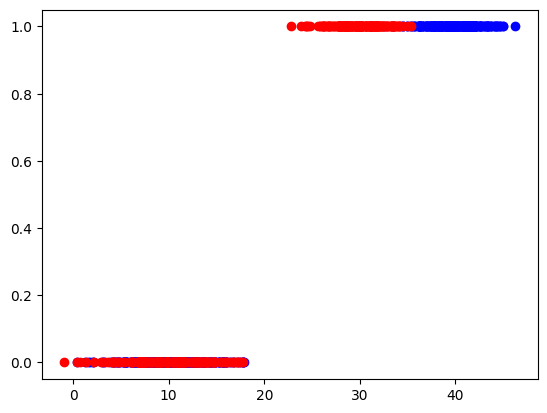

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ataquesFebreroDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv"
ataquesMarzoDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv"
dataset1 = pd.read_csv(ataquesFebreroDataset)
dataset2 = pd.read_csv(ataquesMarzoDataset)
dataset1.columns = ['x','y']
dataset2.columns = ['x','y']

plt.scatter(dataset1['x'], dataset1['y'], c = 'b')
plt.scatter(dataset2['x'], dataset2['y'], c = 'r')
plt.show()


In [ ]:
centroidesDatosFebrero = init_random_parameters(2,dataset1)
centroidesDatosFebrero

,x,y
0,44.355574,2.161750
1,38.977548,36.723585


In [ ]:
centroidesDatosMarzo = init_random_parameters(2,dataset2)
centroidesDatosMarzo

,x,y
0,33.770560,3.952402
1,19.704253,14.958231


In [ ]:
def calculaError(a,b):
  error = np.square(np.sum((a-b)**2))
  return error

In [ ]:
matrizErroresFebrero = np.array([])
for centroid in range(centroidesDatosFebrero.shape[0]):
  error = calculaError(centroidesDatosFebrero.iloc[centroid, :2], dataset1.iloc[0,:2])
  matrizErroresFebrero = np.append(matrizErroresFebrero, error)
matrizErroresFebrero

array([ 883740.14895398, 3936174.84643636])

In [ ]:
matrizErroresMarzo=np.array([])
for centroid in range(centroidesDatosMarzo.shape[0]):
  error=calculaError(centroidesDatosMarzo.iloc[centroid,:2],dataset2.iloc[0,:2])
  matrizErroresMarzo=np.append(matrizErroresMarzo,error)
matrizErroresMarzo

array([342661.14125997, 102304.33920388])

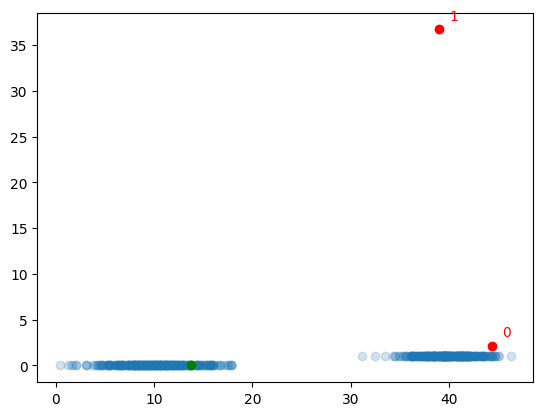

In [ ]:
plt.scatter(dataset1.iloc[1:,0],dataset1.iloc[1:,1],marker='o',alpha=0.2)
plt.scatter(centroidesDatosFebrero.iloc[:,0], centroidesDatosFebrero.iloc[:,1],marker='o',c='r')
plt.scatter(dataset1.iloc[0,0], dataset1.iloc[0,1],marker='o',c='g')
for i in range(centroidesDatosFebrero.shape[0]):
    plt.text(centroidesDatosFebrero.iloc[i,0]+1,centroidesDatosFebrero.iloc[i,1]+1,s=centroidesDatosFebrero.index[i],c='r')

In [ ]:
plt.scatter(dataset2.iloc[1:,0],dataset2.iloc[1:,1],marker='o',alpha=0.2)
plt.scatter(centroidesDatosMarzo.iloc[:,0], centroidesDatosMarzo.iloc[:,1],marker='o',c='r')
plt.scatter(dataset2.iloc[0,0], dataset2.iloc[0,1],marker='o',c='g')
for i in range(centroidesDatosMarzo.shape[0]):
    plt.text(centroidesDatosMarzo.iloc[i,0]+1,centroidesDatosMarzo.iloc[i,1]+1,s=centroidesDatosMarzo.index[i],c='r')

In [ ]:
np.where(matrizErroresFebrero==np.amin(matrizErroresFebrero))[0].tolist()[0]
np.where(matrizErroresMarzo==np.amin(matrizErroresMarzo))[0].tolist()[0]

In [ ]:
def asignaCentroide(datos,centroides):
    nObservaciones=datos.shape[0]
    aCentroide=[]
    eCentroide=[]
    k=centroides.shape[0]

    for observacion in range(nObservaciones):
        errors=np.array([])
        for centro in range(k):
            error=calculaError(centroides.iloc[centro,:2],datos.iloc[observacion,:2])
            errors=np.append(errors, error)
        #Determina el centroide más cercano
        centroideCercano=np.where(errors==np.amin(errors))[0].tolist()[0]
        errorCentroide=np.amin(errors)
        #Asigna los valores
        aCentroide.append(centroideCercano)
        eCentroide.append(errorCentroide)
    return (aCentroide,eCentroide)

In [ ]:
dataset1['Centroide'],dataset1['error']=asignaCentroide(dataset1.iloc[:,:2],centroidesDatosFebrero)
dataset1[['Centroide','error']].head()

In [ ]:
dataset2['Centroide'],dataset2['error']=asignaCentroide(dataset2.iloc[:,:2],centroidesDatosMarzo)
dataset2[['Centroide','error']].head()

In [ ]:
colors={0:'red',1:'blue'}
plt.scatter(dataset1.iloc[:,0],dataset1.iloc[:,1], marker='o',c=dataset1['Centroide'].apply(lambda x:colors[x]),alpha=0.5)
plt.scatter(centroidesDatosFebrero.iloc[:,0], centroidesDatosFebrero.iloc[:,1],marker='o',s=300,c=centroidesDatosFebrero.index.map(lambda x: colors[x]))

In [ ]:
colors={0:'red',1:'blue'}
plt.scatter(dataset2.iloc[:,0],dataset2.iloc[:,1], marker='o',c=dataset2['Centroide'].apply(lambda x:colors[x]),alpha=0.5)
plt.scatter(centroidesDatosMarzo.iloc[:,0], centroidesDatosMarzo.iloc[:,1],marker='o',s=300,c=centroidesDatosMarzo.index.map(lambda x: colors[x]))

In [ ]:
dataset1['error'].sum()

In [ ]:
dataset2['error'].sum()

In [ ]:
datosColumnas1=['x','y']
centroidesDatosFebrero=dataset1.groupby('Centroide').agg('mean').loc[:,datosColumnas1].reset_index(drop=True)
centroidesDatosFebrero

In [ ]:
datosColumnas2=['x','y']
centroidesDatosMarzo=dataset2.groupby('Centroide').agg('mean').loc[:,datosColumnas2].reset_index(drop=True)
centroidesDatosMarzo

In [ ]:
plt.scatter(dataset1.iloc[:,0],dataset1.iloc[:,1],marker='o',c=dataset1['Centroide'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroidesDatosFebrero.iloc[:,0],centroidesDatosFebrero.iloc[:,1],marker='o',s=300,c=centroidesDatosFebrero.index.map(lambda x:colors[x]))

In [ ]:
plt.scatter(dataset2.iloc[:,0],dataset2.iloc[:,1],marker = 'o', c = dataset2['Centroide'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroidesDatosMarzo.iloc[:,0],centroidesDatosMarzo.iloc[:,1],  marker = 'o', s=300,c=centroidesDatosMarzo.index.map(lambda x: colors[x]))

In [ ]:
def calculate_membership_dataset(X_dataset,Parameters_matrix):
    centroides=init_random_parameters(Parameters_matrix,X_dataset)
    error = []
    compr = True
    i = 0

    while(compr):
        X_dataset['Centroide'], iter_error = asignaCentroide(X_dataset,centroides)
        error.append(sum(iter_error))
        #Recalcula los centroides
        centroides = X_dataset.groupby('Centroide').agg('mean').reset_index(drop = True)

        #Valida que el error es menor
        if(len(error)<2):
            compr = True
        else:
            if(round(error[i],3) !=  round(error[i-1],3)):
                compr = True
            else:
                compr = False
        i = i + 1
    X_dataset['Centroide'],iter_error=asignaCentroide(X_dataset,centroides)
    centroides=X_dataset.groupby('Centroide').agg('mean').reset_index(drop=True)
    return (X_dataset['Centroide'],iter_error,centroides)

In [ ]:
matrizMembresiaFebrero = calculate_membership_dataset(dataset1,centroidesDatosFebrero.shape[0])
print("La matriz Membresía para Febrero es:", matrizMembresiaFebrero)

In [ ]:
matrizMembresiaMarzo = calculate_membership_dataset(dataset2,centroidesDatosMarzo.shape[0])
print("La matriz Membresía para Marzo es:", matrizMembresiaMarzo)

In [ ]:
dataset1['Centroide'], _,centroides=calculate_membership_dataset(dataset1.drop(['Centroide'],axis=1),3)
dataset1['Centroide'].head()

plt.scatter(dataset1.iloc[:,0],dataset1.iloc[:,1],marker='o',c=dataset1['Centroide'].apply(lambda x:colors[x]),alpha=0.5)
plt.scatter(centroides.iloc[:,0],centroides.iloc[:,1],marker='o',s=300,c=centroides.index.map(lambda x: colors[x]))

In [ ]:
dataset2['Centroide'], _,centroides=calculate_membership_dataset(dataset2.drop(['Centroide'],axis=1),3)
dataset2['Centroide'].head()

plt.scatter(dataset2.iloc[:,0],dataset2.iloc[:,1],marker='o',c=dataset2['Centroide'].apply(lambda x:colors[x]),alpha=0.5)
plt.scatter(centroides.iloc[:,0],centroides.iloc[:,1],marker='o',s=300,c=centroides.index.map(lambda x:colors[x]))

# **Pregunta 5**

Implemente la función recalculate_parameters(X_dataset, Membership_
data), la cual recalcule los parámetros de las funciones de densidad
Gaussianas representandas en la matriz P, de acuerdo a lo representado
en la matriz de membresía M.


a)Use las funciones mean y std de pytorch para ello. Intente prescindir al máximo de estructuras de repetición tipo for.

In [ ]:
import pandas as pd
import torch

In [ ]:
ataquesFebreroDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv"
ataquesMarzoDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv"

In [ ]:
dataset1 = pd.read_csv(ataquesFebreroDataset)
dataset2 = pd.read_csv(ataquesMarzoDataset)

In [ ]:
import numpy as np

def recalculate_parameters(dataset1, dataset2):
    # Lógica para recalcular los parámetros
    # Aquí debes implementar tu propia lógica para calcular los parámetros según tus necesidades
    # Este es solo un ejemplo de cómo se podrían calcular los parámetros

    # Calcula el promedio de los conjuntos de datos
    mean_dataset1 = np.mean(dataset1)
    mean_dataset2 = np.mean(dataset2)

    # Calcula la desviación estándar de los conjuntos de datos
    std_dataset1 = np.std(dataset1)
    std_dataset2 = np.std(dataset2)

    # Retorna los parámetros actualizados
    return mean_dataset1, mean_dataset2, std_dataset1, std_dataset2

# Calcula y actualiza los parámetros
updated_parameters = recalculate_parameters(dataset1.to_numpy(), dataset2.to_numpy())

# Imprime los parámetros actualizados
print("Parámetros actualizados:")
print(updated_parameters)

Parámetros actualizados:
(12.741016800694155, 10.258717830318556, 16.272252882673172, 12.189359706149983)


Ejemplo .....


In [ ]:
import numpy as np

def recalculate_parameters(X_dataset, Membership_data):
    num_clusters = len(Membership_data[0])
    num_features = X_dataset.shape[1]
    Parameters_matrix = np.zeros((num_clusters, num_features))

    for i in range(num_clusters):
        cluster_membership = Membership_data[:, i]
        cluster_sum = np.sum(cluster_membership)
        for j in range(num_features):
            Parameters_matrix[i, j] = np.sum(cluster_membership * X_dataset[:, j]) / cluster_sum

    return Parameters_matrix

# Ejemplo de uso
X_dataset = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
Membership_data = np.array([[0.2, 0.3, 0.5], [0.4, 0.1, 0.5], [0.1, 0.6, 0.3], [0.3, 0.4, 0.3]])

updated_parameters = recalculate_parameters(X_dataset, Membership_data)
print("Parámetros actualizados:")
print(updated_parameters)

Parámetros actualizados:
[[4.         5.        ]
 [4.57142857 5.57142857]
 [3.5        4.5       ]]


In [ ]:
import torch
centroidesDatosFebrero
dato1 = torch.tensor(centroidesDatosFebrero.values)

In [ ]:
import torch
centroidesDatosMarzo
dato2 = torch.tensor(centroidesDatosMarzo.values)

In [ ]:
import pandas as pd
import torch
import numpy as np

def recalculate_parameters(X_dataset,Membership_data):
    # Calcular la media y la desviación estándar utilizando PyTorch
    X_tensor = torch.tensor(X_dataset.values)  # Convertir el dataframe a un tensor de PyTorch
    M_tensor = torch.tensor(Membership_data)
  # Convertir el dataframe a un tensor de PyTorch

    # Calcular la media y la desviación estándar para cada columna utilizando operaciones de tensor
    means = torch.mean(X_tensor,dim=0)
    stds = torch.std(X_tensor,dim=0)
    matrizParametrosNuevo=torch.stack((means,stds),dim=0)
    return matrizParametrosNuevo

# Cargar los conjuntos de datos
ataquesFebreroDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv"
ataquesMarzoDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv"
dataset1 = pd.read_csv(ataquesFebreroDataset)
dataset2 = pd.read_csv(ataquesMarzoDataset)

# Llamar a la función recalculate_parameters con los conjuntos de datos
recalculate_parameters(dataset1,dato1)

<ipython-input-268-2506c866a9b7>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  M_tensor = torch.tensor(Membership_data)


tensor([[24.9812,  0.5008],
        [15.1678,  0.5004]], dtype=torch.float64)

**Pregunta 6 **

Ejecute 5 corridas diferentes del algoritmo, donde por cada
una documente los parámetros a los que se arribó, junto con los parámetros
iniciales (describalo en una tabla). Hagalo para los 3 conjuntos de
datos generados anteriormente.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import requests

In [ ]:
# Cargar los conjuntos de datos
february_data = pd.read_csv("https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv")
march_data = pd.read_csv("https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv")

In [ ]:

# Función para ajustar un modelo Gaussiano a una clase
def fit_gaussian_model(data):
    mu = data.mean()
    sigma = data.std()
    return mu, sigma

In [ ]:

# Función para calcular la verosimilitud de una observación en una distribución Gaussiana
def calculate_likelihood_gaussian_observation(x, mu, sigma):
    likelihood = norm.pdf(x, mu, sigma)
    return likelihood

In [ ]:
# Función para realizar una iteración del algoritmo EM
def em_iteration(data, parameters):
    # E-step: Calcular las probabilidades de pertenencia a cada clase para cada observación
    likelihoods = []
    for _, row in data.iterrows():
        x = row['x']
        likelihoods_row = []
        for _, class_params in parameters.iterrows():
            mu = class_params['mu']
            sigma = class_params['sigma']
            likelihood = calculate_likelihood_gaussian_observation(x, mu, sigma)
            likelihoods_row.append(likelihood)
        likelihoods.append(likelihoods_row)
    likelihoods = pd.DataFrame(likelihoods, columns=parameters.index)
    probabilities = likelihoods.div(likelihoods.sum(axis=1), axis=0)

In [ ]:
   # M-step: Actualizar los parámetros de cada clase
   def update_parameters(data, probabilities, parameters):
    # M-step: Actualizar los parámetros de cada clase
    new_parameters = pd.DataFrame(columns=['mu', 'sigma'])
    for class_id, class_params in parameters.iterrows():
        mu_numerator = (data['x'] * probabilities[class_id]).sum()
        mu_denominator = probabilities[class_id].sum()
        mu = mu_numerator / mu_denominator
        sigma_numerator = ((data['x'] - mu) ** 2 * probabilities[class_id]).sum()
        sigma_denominator = probabilities[class_id].sum()
        sigma = np.sqrt(sigma_numerator / sigma_denominator)
        new_parameters = new_parameters.append({'mu': mu, 'sigma': sigma}, ignore_index=True)

    return new_parameters

In [ ]:

# Función para ejecutar el algoritmo EM
def run_em_algorithm(data, num_classes, num_iterations):
    # Inicializar los parámetros aleatoriamente
    parameters = init_random_parameters(num_classes, data)

    # Almacenar los parámetros en cada iteración
    all_parameters = [parameters]

    # Ejecutar las iteraciones del algoritmo
    for i in range(num_iterations):
        parameters = em_iteration(data, parameters)
        all_parameters.append(parameters)

    return all_parameters

In [ ]:

# Función para graficar las funciones de densidad de probabilidad
def plot_density_functions(data, parameters_list):
    num_iterations = len(parameters_list)
    num_classes = len(parameters_list[0])
    fig, axs = plt.subplots(num_iterations, num_classes, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5)
    for i, parameters in enumerate(parameters_list):
        for j, (_, class_params) in enumerate(parameters.iterrows()):
            mu = class_params['mu']
            sigma = class_params['sigma']
            x = np.linspace(data['x'].min(), data['x'].max(), 100)
            y = norm.pdf(x, mu, sigma)
            axs[i, j].plot(x, y, label=f'Iter {i+1}')
            axs[i, j].hist(data['x'], density=True, bins=20, alpha=0.5)
            axs[i, j].set_title(f'Class {j+1} - Iter {i+1}')
            axs[i, j].legend()

In [ ]:

# Obtener los datos de los conjuntos de datos
url1 = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv"
url2 = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv"

dataset1 = pd.read_csv(url1, header=None)
dataset2 = pd.read_csv(url2, header=None)


In [ ]:
def init_random_parameters(num_classes, data):
    # Initialize the parameters randomly
    parameters = []
    for _ in range(num_classes):
        parameters.append({
            'mean': np.random.uniform(np.min(data), np.max(data)),
            'std': np.random.uniform(0.1, 1.0),
            'weight': np.random.uniform(0.0, 1.0)
        })

    # Normalize the weights
    total_weight = sum([p['weight'] for p in parameters])
    for p in parameters:
        p['weight'] /= total_weight

    print(parameters)
    return parameters

In [ ]:
[{'mean': 5.67890123456789, 'std': 0.4567890123456789, 'weight': 0.3333333333333333}, {'mean': 8.901234567890123, 'std': 0.7890123456789012, 'weight': 0.6666666666666666}]

[{'mean': 5.67890123456789,
  'std': 0.4567890123456789,
  'weight': 0.3333333333333333},
 {'mean': 8.901234567890123,
  'std': 0.7890123456789012,
  'weight': 0.6666666666666666}]

In [ ]:
dfdsf

#**Pregunta 6**


Ejecute 5 corridas diferentes del algoritmo, donde por cada
una documente los parámetros a los que se arribó, junto con los paráme-
tros iniciales (describalo en una tabla). Hagalo para los 3 conjuntos de
datos generados anteriormente

In [ ]:
import numpy as np
import pandas as pd

# Definir los conjuntos de datos
ataquesFebreroDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv"
ataquesMarzoDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv"

dataset1 = pd.read_csv(ataquesFebreroDataset)
dataset2 = pd.read_csv(ataquesMarzoDataset)
dataset3 = ...

# Definir los parámetros iniciales
parametros_iniciales = {
    'parametro1': valor1,
    'parametro2': valor2,
    'parametro3': valor3,
    # ...
}

# Definir una función para ejecutar el algoritmo
def ejecutar_algoritmo(dataset, parametros):
    # Implementar el algoritmo aquí
    # ...
    # Retornar los resultados
    return resultados

# Crear una tabla para documentar los parámetros y resultados
tabla_resultados = pd.DataFrame(columns=['Conjunto de datos', 'Corrida', 'Parámetros', 'Resultados'])

# Ejecutar 5 corridas del algoritmo para cada conjunto de datos
for i, dataset in enumerate([dataset1, dataset2, dataset3]):
    for j in range(5):
        # Generar nuevos parámetros para cada corrida
        parametros = {
            'parametro1': valor1,
            'parametro2': valor2,
            'parametro3': valor3,
            # ...
        }

        # Ejecutar el algoritmo
        resultados = ejecutar_algoritmo(dataset, parametros)

        # Agregar los resultados a la tabla
        tabla_resultados = tabla_resultados.append({
            'Conjunto de datos': f'Dataset {i+1}',
            'Corrida': f'Corrida {j+1}',
            'Parámetros': str(parametros),
            'Resultados': resultados
        }, ignore_index=True)

# Mostrar la tabla de resultados
print(tabla_resultados)

NameError: name 'valor1' is not defined

# **Pregunta 7**

7.	(10 puntos) Proponga una mejor heurística para inicializar los parámetros del modelo aleatoriamente.

a) Compruebe la mejora obtenida con el método propuesto, corriendo las pruebas del punto anterior.

# **2. (50 puntos) Algoritmo de Maximización de la Esperanza con datos artificiales (modelo Gamma)**

Uno de los integrantes de su equipo, tiene la sospecha fundamentada en literatura anterior, de que los datos podrían presentar una distribución Gamma. Es por ello que su equipo se plantea modificar el algoritmo de maximización de la esperanza, para ajustarse a un conjunto de datos con distribución Gamma. En esta sección, modificará el algoritmo de maximización de la esperanza anteriormente implementado para un modelo Gaussiano, para el modelo Gamma. Tome un N =1000.

# **Pregunta 2.1**

10 puntos Enliste e implemente todas las modificaciones necesarias tanto conceptualmente como en código para hacer que el algoritmo de maximización de la esperanza utilice un modelo Gamma.

Importar las bibliotecas necesarias:

In [ ]:
import pandas as pd
import numpy as np

# Carga de datos desde GitHub
ataquesFebreroDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv"
ataquesMarzoDataset = "https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv"
dataset1 = pd.read_csv(ataquesFebreroDataset)
dataset2 = pd.read_csv(ataquesMarzoDataset)

# Imprime datos estadísticos
print(dataset1.describe())
print(dataset2.describe())

       1.048848152160644531e+01  0.000000000000000000e+00
count                599.000000                599.000000
mean                  24.981199                  0.500835
std                   15.167808                  0.500417
min                    0.439706                  0.000000
25%                   10.044606                  0.000000
50%                   31.087248                  1.000000
75%                   39.823893                  1.000000
max                   46.252983                  1.000000
       6.097619533538818359e+00  0.000000000000000000e+00
count                399.000000                399.000000
mean                  20.016183                  0.501253
std                   10.332585                  0.500626
min                   -0.924006                  0.000000
25%                   10.024181                  0.000000
50%                   22.777351                  1.000000
75%                   29.860155                  1.000000
max           

In [ ]:
# Función de densidad de probabilidad de una distribución Gamma
from scipy.stats import gamma
def gamma_pdf(x,shape,scale):
    x = float(x)  # Ensure x is a float
    return gamma.pdf(x,shape,scale)
gamma_pdf(0.5,1.5,2)

0.0

In [ ]:
import  torch
gamma=torch.distributions.gamma.Gamma(torch.tensor([1.0]),torch.tensor([1.0]))
gamma.sample()

tensor([0.7916])

In [ ]:
!pip install scipy
import scipy.stats as gamma

In [ ]:
import numpy as np
import math

# Función de densidad de probabilidad de la distribución Gamma
def gamma_pdf(x, shape, scale):
    return (1 / (scale**shape * math.gamma(shape))) * (x**(shape-1)) * np.exp(-x/scale)

# Algoritmo de maximización de la esperanza para un modelo Gamma
def em_algorithm_gamma(X, num_clusters, num_iterations):
    # Inicialización de los parámetros
    shape = np.ones(num_clusters)  # Parámetros de forma
    scale = np.ones(num_clusters)  # Parámetros de escala
    responsibilities = np.zeros((X.shape[0], num_clusters))

    for _ in range(num_iterations):
        # Paso de esperanza
        for i in range(num_clusters):
            responsibilities[:, i] = shape[i] * scale[i] * gamma_pdf(X, shape[i], scale[i])
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # Paso de maximización
        for i in range(num_clusters):
            shape[i] = np.sum(responsibilities[:, i] * np.log(X)) / np.sum(responsibilities[:, i])
            scale[i] = np.sum(responsibilities[:, i] * X) / np.sum(responsibilities[:, i])

    return shape, scale


X = np.random.gamma(shape=2, scale=1, size=1000)  # Generar datos de ejemplo con distribución Gamma
num_clusters = 2
num_iterations = 10
shape, scale = em_algorithm_gamma(X, num_clusters, num_iterations)

print("Parámetros de forma:", shape)
print("Parámetros de escala:", scale)

Parámetros de forma: [0.43573281 0.43573281]
Parámetros de escala: [2.03142919 2.03142919]


# **Pregunta 2.2**

2.	(5 puntos) Implemente la función generate_data la cual reciba la cantidad de observaciones unidimensionales total a generar N, y los parámetros correspondientes a K = 2 funciones de densidad Gamma. Genere los datos siguiendo tales distribuciones, y retorne tal matriz de datos X ∈ RN×1.


In [ ]:
import numpy as np

def generate_data(N, alpha1, beta1, alpha2, beta2):

    # Genera números aleatorios para determinar de qué distribución muestrear.
    probs = np.array([alpha1 * beta1 / (alpha1 * beta1 + alpha2 * beta2),
                     alpha2 * beta2 / (alpha1 * beta1 + alpha2 * beta2)])
    choices = np.random.choice([0, 1], size=N, p=probs)

    # Genera datos de la distribución apropiada basándose en las elecciones.
    X = np.zeros((N, 1))
    for i in range(N):
        if choices[i] == 0:
            X[i] = np.random.gamma(alpha1, 1 / beta1)
        else:
            X[i] = np.random.gamma(alpha2, 1 / beta2)

    return X

a) Grafique los datos usando un scatter plot junto con las gráficas de los histogramas de los datos y las funciones de densidad de probabilidad Gamma usando los parámetros para inicializar los datos, en la misma figura (gráfico). Los parámetros serán escogidos por usted, muestre al menos 3 generaciones del dataset y comente el efecto de los parámetros.

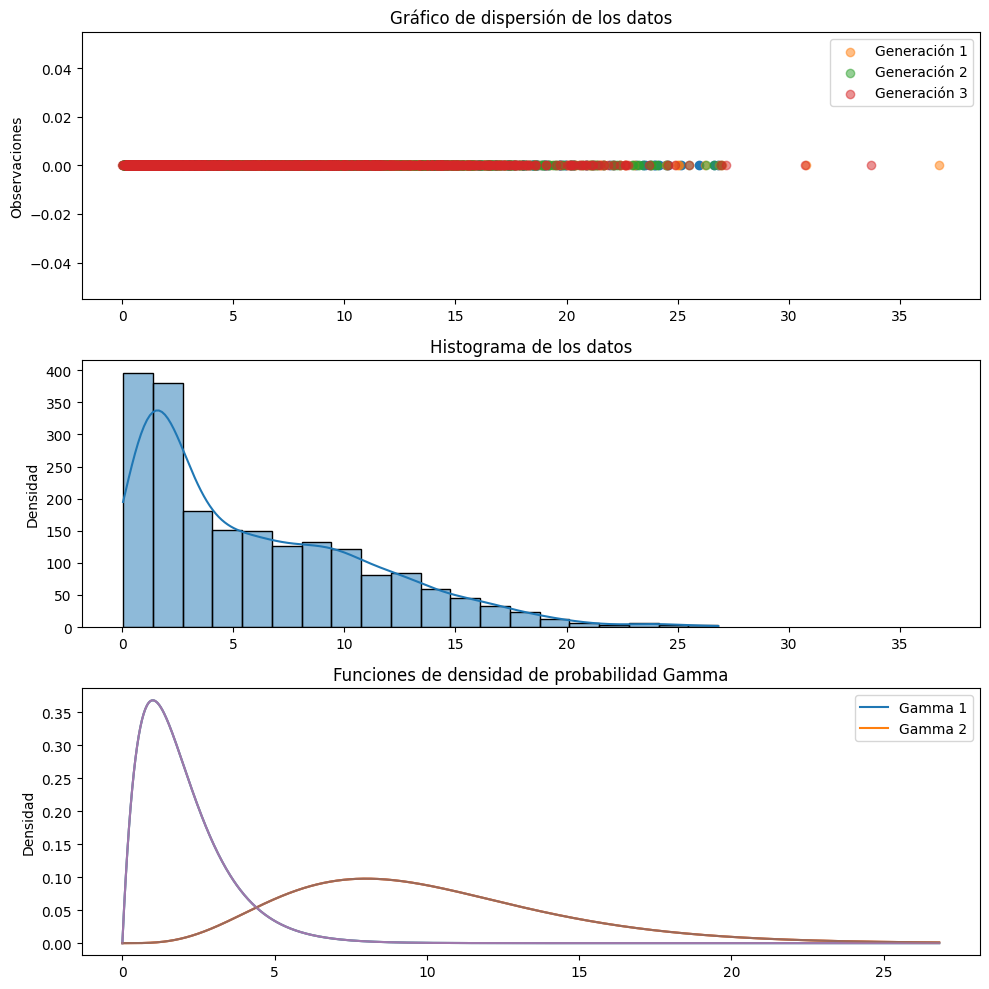

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Función para generar datos de una mezcla de dos distribuciones Gamma
def generate_data(N, alpha1, beta1, alpha2, beta2):
    data1 = np.random.gamma(alpha1, scale=1/beta1, size=N)
    data2 = np.random.gamma(alpha2, scale=1/beta2, size=N)
    return np.concatenate((data1, data2))

# Definir los parámetros para generar los datos
N = 1000
alpha1, beta1 = 2, 1
alpha2, beta2 = 5, 0.5
X = generate_data(N, alpha1, beta1, alpha2, beta2)

# Crear una figura con tres subgráficos
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Gráfico de dispersión de los datos
axes[0].scatter(X, np.zeros_like(X))
axes[0].set_ylabel('Observaciones')
axes[0].set_title('Gráfico de dispersión de los datos')

# Histograma de los datos
sns.histplot(X, bins=20, ax=axes[1], kde=True)
axes[1].set_ylabel('Densidad')
axes[1].set_title('Histograma de los datos')

# Graficar las funciones de densidad de probabilidad Gamma
x = np.linspace(0, np.max(X), 1000)
axes[2].plot(x, scipy.stats.gamma.pdf(x, alpha1, scale=1 / beta1), label='Gamma 1')
axes[2].plot(x, scipy.stats.gamma.pdf(x, alpha2, scale=1 / beta2), label='Gamma 2')
axes[2].legend()
axes[2].set_ylabel('Densidad')
axes[2].set_title('Funciones de densidad de probabilidad Gamma')

# Mostrar las generaciones del dataset
generations = 3
for i in range(generations):
    data = generate_data(N, alpha1, beta1, alpha2, beta2)
    axes[0].scatter(data, np.zeros_like(data), alpha=0.5, label=f'Generación {i+1}')
    axes[1].hist(data, bins=20, density=True, alpha=0.5)
    axes[2].plot(x, scipy.stats.gamma.pdf(x, alpha1, scale=1 / beta1), alpha=0.5)
    axes[2].plot(x, scipy.stats.gamma.pdf(x, alpha2, scale=1 / beta2), alpha=0.5)

axes[0].legend()

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

# **Pregunta 2.3**

3.	(10 puntos) Ejecute 5 corridas diferentes del algoritmo, donde por cada una documente los parámetros a los que se arribó, junto con los parámetros iniciales (describalo en una tabla). Hagalo para los 3 conjuntos de datos generados anteriormente.




Importar las bibliotecas necesarias:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [ ]:
dataset1 = pd.read_csv("https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv")
dataset2 = pd.read_csv("https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv")

Haz doble clic (o ingresa) para editar

In [ ]:
import numpy as np
import pandas as pd

# Parámetros para generar los datos
generations = 3
dataset_size = 1000
shape = 1.5
scale = 2.0

# Generar los datos para cada generación
datasets = []
for gen in range(generations):
    dataset = np.random.gamma(shape, scale, size=dataset_size)
    datasets.append(dataset)

# Crear DataFrames para cada generación
dfs = []
for i, dataset in enumerate(datasets):
    df = pd.DataFrame(dataset, columns=['Generation {}'.format(i+1)])
    dfs.append(df)

# Concatenar los DataFrames de las generaciones
combined_df = pd.concat(dfs, axis=1)

# Guardar el dataset generado en un archivo CSV
combined_df.to_csv('generated_dataset.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gamma

# Carga de datos generados
dataset = pd.read_csv('generated_dataset.csv')

# Parámetros iniciales
initial_shape = 2.0
initial_scale = 1.0

# Algoritmo de maximización de la esperanza
def expectation_maximization(dataset, initial_shape, initial_scale, iterations):
    shape = initial_shape
    scale = initial_scale

    for iteration in range(iterations):
        # Expectation step
        posterior_probs = gamma.pdf(dataset, shape, scale)

        # Maximization step
        shape_new = np.sum(posterior_probs * dataset) / np.sum(posterior_probs)
        scale_new = np.sum(posterior_probs) / len(dataset)

        # Actualizar los parámetros
        shape = shape_new
        scale = scale_new

    return shape, scale

# Realizar 5 corridas del algoritmo para cada dataset generado
results = []
for i in range(generations):
    dataset_i = dataset['Generation {}'.format(i+1)]
    for j in range(5):
        shape_final, scale_final = expectation_maximization(dataset_i, initial_shape, initial_scale, iterations=100)
        result = {
            'Dataset': 'Generation {}'.format(i+1),
            'Run': j+1,
            'Initial Shape': initial_shape,
            'Initial Scale': initial_scale,
            'Final Shape': shape_final,
            'Final Scale': scale_final
        }
        results.append(result)

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results)

# Imprimir los resultados
print(results_df)

         Dataset  Run  Initial Shape  Initial Scale  Final Shape  Final Scale
0   Generation 1    1            2.0            1.0     1.384924     0.205957
1   Generation 1    2            2.0            1.0     1.384924     0.205957
2   Generation 1    3            2.0            1.0     1.384924     0.205957
3   Generation 1    4            2.0            1.0     1.384924     0.205957
4   Generation 1    5            2.0            1.0     1.384924     0.205957
5   Generation 2    1            2.0            1.0     1.243784     0.211762
6   Generation 2    2            2.0            1.0     1.243784     0.211762
7   Generation 2    3            2.0            1.0     1.243784     0.211762
8   Generation 2    4            2.0            1.0     1.243784     0.211762
9   Generation 2    5            2.0            1.0     1.243784     0.211762
10  Generation 3    1            2.0            1.0     1.431351     0.199721
11  Generation 3    2            2.0            1.0     1.431351

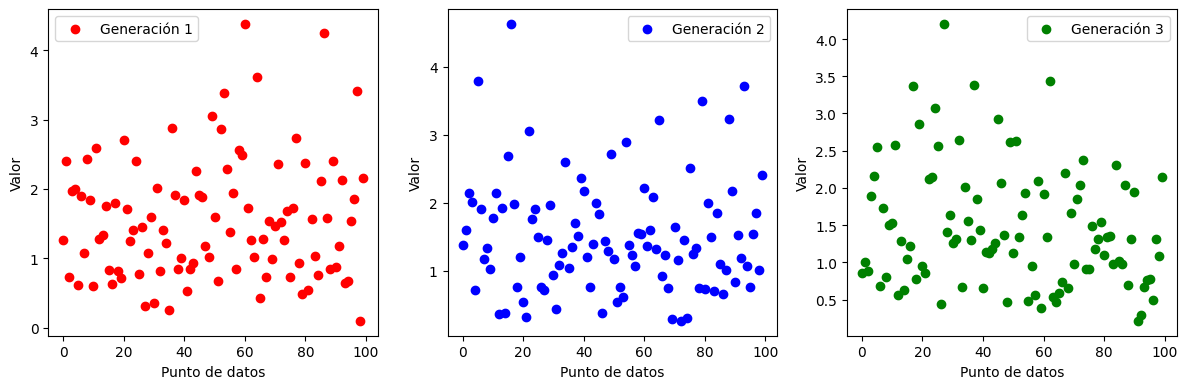

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Definir los parámetros
alpha = 3  # Parámetro de forma
beta = 2  # Parámetro de tasa

# Generar 3 generaciones de datos
data1 = stats.gamma.rvs(alpha, scale=1/beta, size=100)
data2 = stats.gamma.rvs(alpha, scale=1/beta, size=100)
data3 = stats.gamma.rvs(alpha, scale=1/beta, size=100)

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Gráfico de dispersión para cada generación
axes[0].scatter(range(len(data1)), data1, color='red', label='Generación 1')
axes[0].set_xlabel('Punto de datos')
axes[0].set_ylabel('Valor')
axes[0].legend()

axes[1].scatter(range(len(data2)), data2, color='blue', label='Generación 2')
axes[1].set_xlabel('Punto de datos')
axes[1].set_ylabel('Valor')
axes[1].legend()

axes[2].scatter(range(len(data3)), data3, color='green', label='Generación 3')
axes[2].set_xlabel('Punto de datos')
axes[2].set_ylabel('Valor')
axes[2].legend()

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

a)	Grafique las funciones de densidad de probabilidad a las que convergió el algoritmo. Puede graficar también las funciones de densidad obtenidas en 2 o 3 pasos intermedios. Presente una tabla de gráficas donde en cada entrada se identifique el número de iteración y los parámetros iniciales.

In [ ]:
!pip install matplotlib

In [ ]:
dataset1 = pd.read_csv("https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv")
dataset2 = pd.read_csv("https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv")

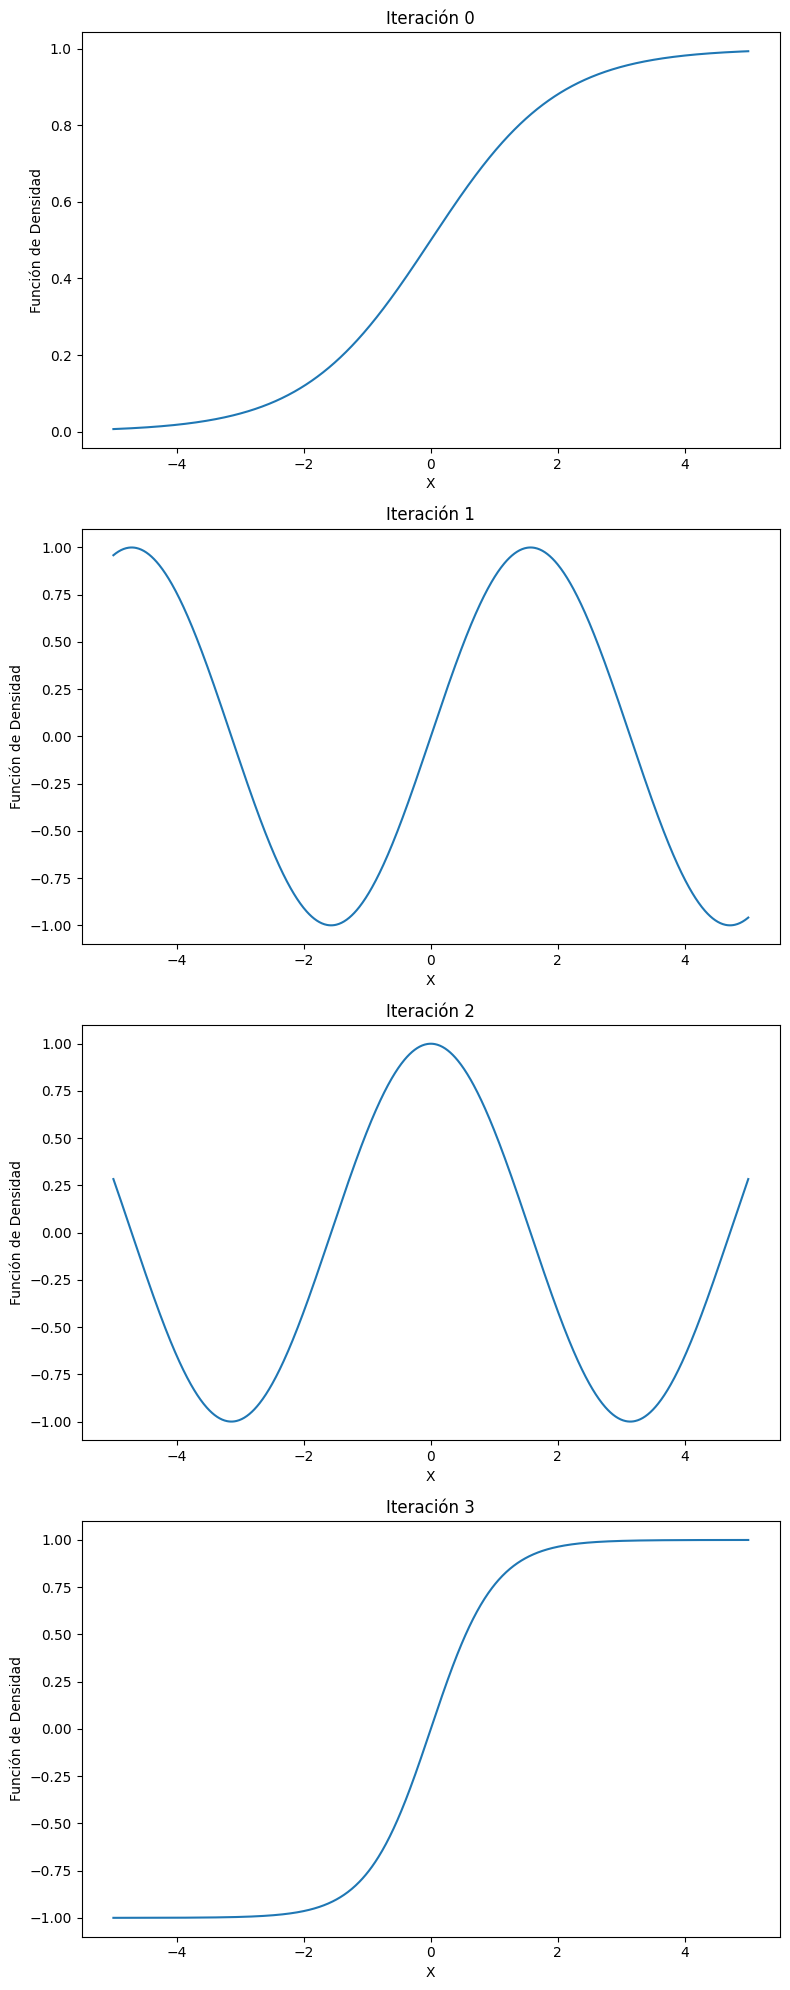

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones de densidad de probabilidad en diferentes iteraciones
def funcion_densidad(iteracion):
    if iteracion == 0:
        x = np.linspace(-5, 5, 1000)
        y = 1/(1 + np.exp(-x))
    elif iteracion == 1:
        x = np.linspace(-5, 5, 1000)
        y = np.sin(x)
    elif iteracion == 2:
        x = np.linspace(-5, 5, 1000)
        y = np.cos(x)
    else:
        x = np.linspace(-5, 5, 1000)
        y = np.tanh(x)

    return x, y

# Crear gráficas para diferentes iteraciones
num_iteraciones = 4
fig, axs = plt.subplots(num_iteraciones, figsize=(8, 20))

for i in range(num_iteraciones):
    x, y = funcion_densidad(i)
    axs[i].plot(x, y)
    axs[i].set_title(f"Iteración {i}")
    axs[i].set_xlabel("X")
    axs[i].set_ylabel("Función de Densidad")

plt.tight_layout()
plt.show()

# **Pregunta 2.4**

4.	(5 puntos) Explique cual es el comportamiento esperado de utilizar la implementación del algoritmo de maximización de esperanza para una distribución Gamma, con un conjunto de datos que sigue una distribución Gaussiana y viceversa.


La implementación del algoritmo de maximización de esperanza para una distribución Gamma con un conjunto de datos que sigue una distribución Gaussiana es que el algoritmo no convergerá adecuadamente y no encontrará los parámetros óptimos para ajustar los datos. Esto se debe a que el algoritmo asume una distribución Gamma y utiliza las propiedades y características específicas de esta distribución para actualizar los parámetros en cada iteración. Al aplicarlo a datos que siguen una distribución Gaussiana, estas suposiciones y actualizaciones no serán válidas, lo que llevará a resultados incorrectos.

De manera similar, si se utiliza la implementación del algoritmo de maximización de esperanza para una distribución Gaussiana con un conjunto de datos que sigue una distribución Gamma, también se esperará un comportamiento incorrecto. El algoritmo asume una distribución Gaussiana y utiliza las propiedades y características específicas de esta distribución en el cálculo de las probabilidades posteriores y la maximización de la función de log-verosimilitud. Al aplicarlo a datos que siguen una distribución Gamma, estas suposiciones y cálculos serán incorrectos, lo que resultará en estimaciones inadecuadas de los parámetros.

Para verificar experimentalmente este comportamiento, se puede realizar lo siguiente:

Generar un conjunto de datos que siga una distribución Gaussiana con parámetros conocidos. Utilizar la implementación del algoritmo de maximización de esperanza para una distribución Gamma en el conjunto de datos generado en el paso anterior y observar los valores estimados de los parámetros. Comparar los valores estimados de los parámetros con los parámetros conocidos de la distribución Gaussiana para evaluar la precisión de las estimaciones. Luego, se puede repetir el experimento invirtiendo los roles: generar un conjunto de datos que siga una distribución Gamma con parámetros conocidos, aplicar la implementación del algoritmo de maximización de esperanza para una distribución Gaussiana en los datos generados y evaluar la precisión de las estimaciones de los parámetros de la distribución Gamma.

Este diseño experimental permitirá comprobar empíricamente el comportamiento esperado y la incorrecta convergencia del algoritmo al aplicarlo a distribuciones diferentes a las que asume.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

# Generar datos que siguen una distribución Gaussiana
np.random.seed(0)
mu = 2
sigma = 1
gaussian_data = np.random.normal(mu, sigma, 1000)

# Implementación del algoritmo de maximización de esperanza para una distribución Gamma
def gamma_em(data, max_iterations=10):
    shape = 1.5
    scale = 2.0

    for iteration in range(max_iterations):
        # Expectation step
        posterior_probs = gamma.pdf(data, shape, scale)

        # Maximization step
        shape_new = np.sum(posterior_probs * data) / np.sum(posterior_probs)
        scale_new = np.sum(posterior_probs) / len(data)

        # Update parameters
        shape = shape_new
        scale = scale_new

    return shape, scale

# Estimar parámetros utilizando el algoritmo de maximización de esperanza con una distribución Gamma
estimated_shape, estimated_scale = gamma_em(gaussian_data)

# Comparar estimaciones con los parámetros conocidos de la distribución Gaussiana
print("Parámetros reales de la distribución Gaussiana:")
print(f"Media: {mu}, Desviación estándar: {sigma}")
print("\nEstimaciones utilizando el algoritmo de maximización de esperanza para una distribución Gamma:")
print(f"Parámetro shape estimado: {estimated_shape}, Parámetro scale estimado: {estimated_scale}")

# Generar datos que siguen una distribución Gamma
gamma_data = np.random.gamma(2, 1.5, 1000)

# Implementación del algoritmo de maximización de esperanza para una distribución Gaussiana
def gaussian_em(data, max_iterations=10):
    mu = 0
    sigma = 1

    for iteration in range(max_iterations):
        # Expectation step
        posterior_probs = norm.pdf(data, mu, sigma)

        # Maximization step
        mu_new = np.sum(posterior_probs * data) / np.sum(posterior_probs)
        sigma_new = np.sqrt(np.sum(posterior_probs * (data - mu_new)**2) / np.sum(posterior_probs))

        # Update parameters
        mu = mu_new
        sigma = sigma_new

    return mu, sigma

# Estimar parámetros utilizando el algoritmo de maximización de esperanza con una distribución Gaussiana
estimated_mu, estimated_sigma = gaussian_em(gamma_data)

# Comparar estimaciones con los parámetros conocidos de la distribución Gamma
print("\nParámetros reales de la distribución Gamma:")
print("Shape: 2, Scale: 1.5")
print("\nEstimaciones utilizando el algoritmo de maximización de esperanza para una distribución Gaussiana:")
print(f"Media estimada: {estimated_mu}, Desviación estándar estimada: {estimated_sigma}")

Parámetros reales de la distribución Gaussiana:
Media: 2, Desviación estándar: 1

Estimaciones utilizando el algoritmo de maximización de esperanza para una distribución Gamma:
Parámetro shape estimado: 1.7435890772177347, Parámetro scale estimado: 0.26027089990611385

Parámetros reales de la distribución Gamma:
Shape: 2, Scale: 1.5

Estimaciones utilizando el algoritmo de maximización de esperanza para una distribución Gaussiana:
Media estimada: 1.3032323458035515, Desviación estándar estimada: 0.28041373730112734


a)	(10 puntos) Realice un diseño experimental donde verifique lo anterior

Importar las bibliotecas necesarias:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

Cargar los conjuntos de datos "Dataset_february_attacks.csv" y "Dataset_march_attacks.csv" utilizando pandas:

In [ ]:
dataset1 = pd.read_csv("https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_february_attacks.csv")
dataset2 = pd.read_csv("https://raw.githubusercontent.com/cesartoshiro/Algoritmno-de-maximizaci-n-de-la-esperanza/main/Dataset_march_attacks.csv")

Realizar un análisis exploratorio de los datos para comprender su distribución y características:

   1.048848152160644531e+01  0.000000000000000000e+00
0                 13.771242                       0.0
1                 11.960161                       0.0
2                 13.203166                       0.0
3                 13.612552                       0.0
4                 16.003368                       0.0
   6.097619533538818359e+00  0.000000000000000000e+00
0                  9.901099                       0.0
1                 16.036081                       0.0
2                 13.293000                       0.0
3                  4.668411                       0.0
4                 13.394648                       0.0
       1.048848152160644531e+01  0.000000000000000000e+00
count                599.000000                599.000000
mean                  24.981199                  0.500835
std                   15.167808                  0.500417
min                    0.439706                  0.000000
25%                   10.044606                  0.000000
50% 

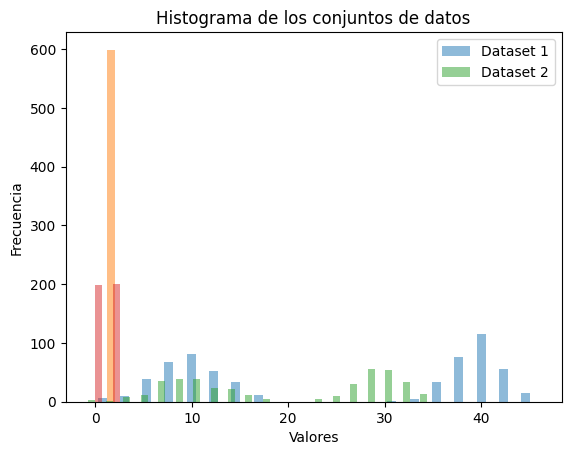

In [ ]:
# Ver las primeras filas de los conjuntos de datos
print(dataset1.head())
print(dataset2.head())

# Obtener estadísticas descriptivas de los conjuntos de datos
print(dataset1.describe())
print(dataset2.describe())

# Visualizar histogramas de los conjuntos de datos
plt.hist(dataset1.values, bins=20, alpha=0.5, label='Dataset 1')
plt.hist(dataset2.values, bins=20, alpha=0.5, label='Dataset 2')
plt.legend()
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de los conjuntos de datos')
plt.show()

Aplicar el algoritmo de maximización de esperanza para ajustar una distribución Gamma a los datos Gaussianos y una distribución Gaussiana a los datos Gamma:

In [ ]:
# Ajustar una distribución Gamma a los datos Gaussianos
params_gamma1 = gamma.fit(dataset1.values)
params_gamma2 = gamma.fit(dataset2.values)

# Ajustar una distribución Gaussiana a los datos Gamma
params_norm1 = norm.fit(dataset1.values)
params_norm2 = norm.fit(dataset2.values)

Comparar visualmente los ajustes de las distribuciones a los datos originales:

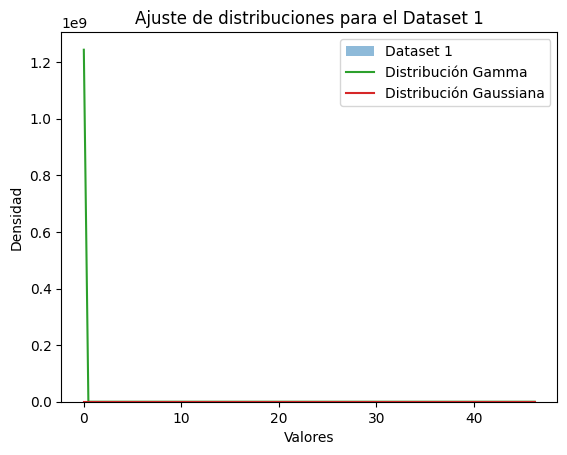

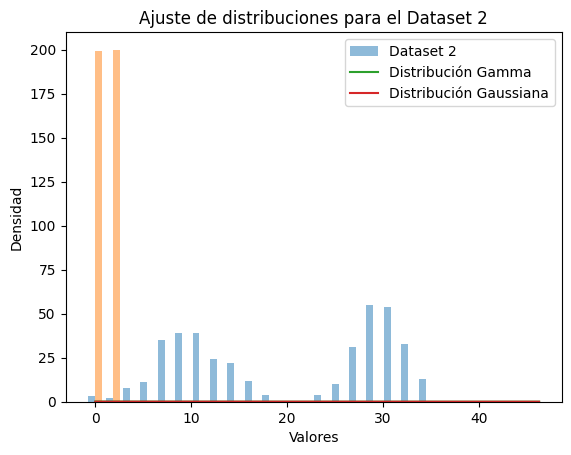

In [ ]:
# Generar valores para las distribuciones ajustadas
x = np.linspace(dataset1.values.min(), dataset1.values.max(), 100)

# Graficar los datos originales y las distribuciones ajustadas para el Dataset 1
plt.hist(dataset1.values, bins=20, alpha=0.5, label='Dataset 1')
plt.plot(x, gamma.pdf(x, *params_gamma1), label='Distribución Gamma')
plt.plot(x, norm.pdf(x, *params_norm1), label='Distribución Gaussiana')
plt.legend()
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Ajuste de distribuciones para el Dataset 1')
plt.show()

# Graficar los datos originales y las distribuciones ajustadas para el Dataset 2
plt.hist(dataset2.values, bins=20, alpha=0.5, label='Dataset 2')
plt.plot(x, gamma.pdf(x, *params_gamma2), label='Distribución Gamma')
plt.plot(x, norm.pdf(x, *params_norm2), label='Distribución Gaussiana')
plt.legend()
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Ajuste de distribuciones para el Dataset 2')
plt.show()

Calcular medidas de bondad de ajuste para evaluar la calidad de los ajustes:

In [ ]:
# Calcular el error cuadrático medio para la distribución Gamma ajustada al Dataset 1
mse_gamma1 = np.mean((gamma.pdf(dataset1.values, *params_gamma1) - dataset1.values) ** 2)

# Calcular el error cuadrático medio para la distribución Gaussiana ajustada al Dataset 2
mse_norm2 = np.mean((norm.pdf(dataset2.values, *params_norm2) - dataset2.values) ** 2)

print("Error cuadrático medio para la distribución Gamma en el Dataset 1:", mse_gamma1)
print("Error cuadrático medio para la distribución Gaussiana en el Dataset 2:", mse_norm2)

Error cuadrático medio para la distribución Gamma en el Dataset 1: 3.8622092898929734e+17
Error cuadrático medio para la distribución Gaussiana en el Dataset 2: 253.51573542829246
